In [82]:
waterkant_festival_description = """The Waterkant Festival is a dynamic and innovative event that takes place annually in Kiel, Germany. Since its inception in 2016, the festival has served as a platform for startups, companies, and creative thinkers to showcase and discuss their ideas on technology, sustainability, and future societal structures. The festival is organized by opencampus.sh, a non-profit association aimed at fostering education and entrepreneurship in Schleswig-Holstein.

Typically held over two days, Waterkant Festival features a diverse array of activities including talks, workshops, and interactive exhibitions. Each year, it gathers hundreds of participants and speakers from various fields—ranging from business and science to politics and the arts—to engage in future-oriented discussions and collaborations. The festival's format includes themed sessions that cover a wide range of topics such as artificial intelligence, sustainability, new work methods, and innovative technology applications.

Waterkant also provides a stage for startups to pitch their ideas and for thought leaders to share insights. The event fosters a strong sense of community and collaboration, with numerous opportunities for networking and co-creation. In addition to professional interactions, the festival incorporates elements of cultural engagement, including live music and social gatherings, creating a vibrant festival atmosphere directly by the waterfront.

Waterkant is notable for its commitment to innovation and its role in promoting the economic and educational development of the region. It supports budding entrepreneurs and established businesses alike, providing a space to explore new ideas and push the boundaries of conventional industry practices​"""

In [83]:
import numpy as np

np_embeddings = np.load('prep/embeddings.npy')

In [84]:
np_embeddings.shape

(112, 1536)

In [85]:
import numpy as np

def find_k_nearest_neighbors(matrix, vec, k):
    """Find the k nearest neighbors in the matrix to the vector vec using cosine similarity.
       Returns both the indices of the nearest neighbors and their cosine similarities."""
    # Normalize the input vector and the matrix for cosine similarity
    vec_norm = vec / np.linalg.norm(vec)
    matrix_norm = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)

    # Compute cosine similarities using matrix multiplication (dot product)
    similarities = np.dot(matrix_norm, vec_norm)

    # Get the indices of the top k similarities using argsort and negative slicing for efficiency
    k_nearest_indices = np.argsort(-similarities)[:k]

    # Get the top k similarities
    k_nearest_distances = similarities[k_nearest_indices]

    return k_nearest_indices, k_nearest_distances

In [86]:
from dotenv import load_dotenv

load_dotenv()  # This loads the environment variables from .env

True

In [87]:
from helper import Document

In [88]:
import json
import uuid
with open('prep/documents.json', 'r') as file:
            json_documents = json.load(file)

loaded_documents = [Document.from_json(json_str) for json_str in json_documents]

In [89]:
print(loaded_documents[0])

Content: Titel: The Story of Europe – Panel Talk
Beschreibung: Europe Think Factory – Panel Talk:Join us as we're highlighting four speakers from four different ecosystems in the North to discuss the "Story of Europe", to open up about their experience in international collaboration, and to share their overall vision for a better together here in Europe.Europe Think Factory is a think tank working on a new narrative of collaboration for innovation, technology, and startups in Europe. Non-profit, independent, a founders collective.
Datum: Friday June 16, 2023 11:00 - 11:45 CEST
Ort: Stage 1
Metadata: {'speakers': [{'name': 'Fabian Böck', 'role': 'Founder', 'organization': 'Europe Think Factory'}, {'name': 'Erdem Ovacik', 'role': 'Founder and Executive Board Member', 'organization': 'Donkey Republic'}, {'name': 'Elina Åkerlind', 'role': 'CEO and founder', 'organization': 'Nordic Node AB'}, {'name': 'Sakina Turabali', 'role': 'Co-founder/Chief Growth Officer', 'organization': 'CodeEasy'}]

In [90]:
from openai import OpenAI
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding



In [91]:
question="Welche Veranstaltungen beschäftigen sich mit Nachhaltigkeit"

In [92]:
question_embedding = get_embedding(question)

In [93]:
type(question_embedding), len(question_embedding)

(list, 1536)

In [94]:
np_question_embedding = np.array(question_embedding)

In [95]:
k=len(np_embeddings)
indices, similarities = find_k_nearest_neighbors(np_embeddings, np_question_embedding, k)

In [96]:
indices

array([ 17,  47,  23,  52,   8,  76,  49,  26,   2,  74, 102,  71,  72,
        48,  64,  88,  89,  91,   4,   7,  29,  16,  77,  31,  41,  38,
        90, 101,  50,  35,  68,   1,  66,  65,  15,  27,   3,  45,  56,
         9, 100,  62,  34,  46,  96,  25,  33,  21,  44,  97,  19,  81,
        13,  20,  57, 111,  37,   0,   5,  43,  28, 109,  73,  98,  51,
        12, 110,   6,  67,  39,  79,  92,  36,  24,  87,  84,  14,  78,
        80,  11,  40, 103,  55,  75, 108,  94,  93, 107,  18, 106,  63,
        70,  61,  60,  59,  42,  86,  69,  30,  22,  83, 105,  85,  32,
        53,  54,  95,  10,  99, 104,  58,  82], dtype=int64)

In [97]:
similarities

array([0.4837622 , 0.48210313, 0.47535294, 0.42665962, 0.41959756,
       0.41773059, 0.41135018, 0.40520366, 0.40498367, 0.40272879,
       0.40117683, 0.39570144, 0.39485883, 0.39317509, 0.39106073,
       0.38882175, 0.38870315, 0.38627675, 0.38506381, 0.38476061,
       0.38461901, 0.38305633, 0.38140445, 0.38088368, 0.37765739,
       0.37549231, 0.37429329, 0.37118127, 0.37019727, 0.3690164 ,
       0.36766809, 0.36757008, 0.36646433, 0.36481017, 0.35658136,
       0.35036043, 0.35029682, 0.34444186, 0.34086156, 0.33930904,
       0.3386449 , 0.33711236, 0.33643541, 0.33521672, 0.33413684,
       0.33191864, 0.33028218, 0.32933831, 0.3292132 , 0.32756757,
       0.3267996 , 0.32613729, 0.32452464, 0.32395547, 0.32325489,
       0.32265113, 0.32176395, 0.32095993, 0.32039016, 0.31960266,
       0.31868617, 0.31379082, 0.31362636, 0.31331164, 0.31178866,
       0.31168026, 0.30932886, 0.3077221 , 0.30678476, 0.30670901,
       0.30659758, 0.3055924 , 0.30043173, 0.29656754, 0.29655

In [98]:
for i, indice in enumerate(indices):
    print(loaded_documents[indice])
    print(f"Distance: {similarities[i]}\n\n")

Content: Titel: Hebel für urbane Transformation: Wie bauen wir unsere Städte klimaneutral um?
Beschreibung: Klimaschutz wird häufig auf globaler oder individueller Ebene diskutiert – dabei benötigen auch unsere Städte einen dringenden Umbau. Nils Kaltenpoth und Thomas Haas von Urban Catalyst erzählen aus dem Maschinenraum, wie  klimaneutrale Städte aussehen könnten, wo dabei Synergien entstehen und welche Rolle Ko-Produktion spielt.
Datum: Friday June 16, 2023 12:00 - 12:45 CEST
Ort: Waterside Tent
Metadata: {'speakers': [{'name': 'Thomas Haas', 'role': 'Transformationsgestalter', 'organization': 'Urban Catalyst GmbH', 'description': 'Ko-produktiv und maßstabsspezifisch entwickeln wir bei Urban Catalyst lebenswerte und klimagerechte Zukunftsvisionen für Räume in Veränderung. Die Schwerpunkte meiner Arbeit liegen der Prozessgestaltung an der Schnittstelle von gebauter Umwelt und gesellschaftlichen Veränderungen.'}, {'name': 'Nils Kaltenpoth', 'role': 'Transformationsgestalter', 'organiz

In [99]:
import matplotlib.pyplot as plt

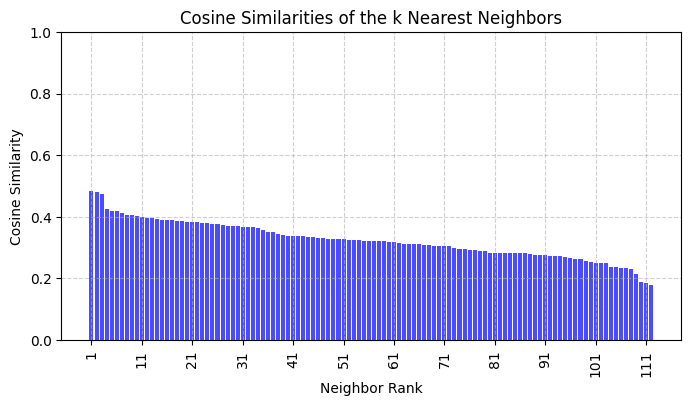

In [100]:
# Plotting the distances
plt.figure(figsize=(8, 4))
plt.bar(range(k), similarities, color='blue', alpha=0.7)
plt.title('Cosine Similarities of the k Nearest Neighbors')
plt.xlabel('Neighbor Rank')
plt.ylabel('Cosine Similarity')
plt.xticks(np.arange(0, k, step=10), [f"{i+1}" for i in range(0, k, 10)])  # Label every 10th point
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.ylim([0, 1])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [101]:
events = [loaded_documents[indice] for indice in indices[:6]]

In [102]:
events_str = ""
for event in events:
    events_str+= event.content +"\n\n"

In [103]:
print(events_str)

Titel: Hebel für urbane Transformation: Wie bauen wir unsere Städte klimaneutral um?
Beschreibung: Klimaschutz wird häufig auf globaler oder individueller Ebene diskutiert – dabei benötigen auch unsere Städte einen dringenden Umbau. Nils Kaltenpoth und Thomas Haas von Urban Catalyst erzählen aus dem Maschinenraum, wie  klimaneutrale Städte aussehen könnten, wo dabei Synergien entstehen und welche Rolle Ko-Produktion spielt.
Datum: Friday June 16, 2023 12:00 - 12:45 CEST
Ort: Waterside Tent

Titel: Im ECO-Mode zu mehr Produktivität im Team!
Beschreibung: Der ECO-Mode ist heute aus vielen elektrischen Geräten nicht mehr wegzudenken. Warum?Weil wir alle nachhaltig mit der Ressource Energie umgehen wollen. Nachhaltigkeit isthierbei das große Schlagwort. Doch wenn wir an Nachhaltigkeit denken, fokussieren wir inder Regel nach außen. Dabei fängt Nachhaltigkeit bei uns selbst an – nach innen gerichtet.Zwei Ressourcen, die wir benötigen, um produktiv zu sein, sind limitiert: Zeit und unsereEne

In [43]:
def replace_placeholders(template, replacements):
    for key, value in replacements.items():
        placeholder = "%" + key + "%"
        template = template.replace(placeholder, value)
    return template

In [105]:
system_prompt = "You are a helpful chatbot for the attendees of the Waterkant Festival! You answer questions about events, schedules, venue information, transportation options, or anything else. The attendees should feel free to ask you. You respond in the same language the user asks the question!"

In [1]:
template="General info\n\n"+waterkant_festival_description+"\n--------------\n"+"Here is a list of events which could be helpful to answer the question:\n\n%events%Answer the question of the Waterkant Festival based on the information above. Here is the question:\n%question%"

NameError: name 'waterkant_festival_description' is not defined

In [52]:
replacements= {"question": question, "events": events_str}

In [53]:
prompt= replace_placeholders(template, replacements)

In [54]:
prompt

'General info\n\nThe Waterkant Festival is a dynamic and innovative event that takes place annually in Kiel, Germany. Since its inception in 2016, the festival has served as a platform for startups, companies, and creative thinkers to showcase and discuss their ideas on technology, sustainability, and future societal structures. The festival is organized by opencampus.sh, a non-profit association aimed at fostering education and entrepreneurship in Schleswig-Holstein.\n\nTypically held over two days, Waterkant Festival features a diverse array of activities including talks, workshops, and interactive exhibitions. Each year, it gathers hundreds of participants and speakers from various fields—ranging from business and science to politics and the arts—to engage in future-oriented discussions and collaborations. The festival\'s format includes themed sessions that cover a wide range of topics such as artificial intelligence, sustainability, new work methods, and innovative technology appl

In [55]:
from openai import OpenAI
client = OpenAI()
messages=[
        {"role": "system", "content": system_prompt},
      ]
messages+= [{"role": "user", "content": prompt}]
completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages,
    temperature=0.0
)

print(completion.choices[0].message.content)

Die folgenden Veranstaltungen beim Waterkant Festival beschäftigen sich mit Nachhaltigkeit:

1. Titel: Hebel für urbane Transformation: Wie bauen wir unsere Städte klimaneutral um?
   Datum: Freitag, 16. Juni 2023, 12:00 - 12:45 Uhr CEST
   Ort: Waterside Tent

2. Titel: Im ECO-Mode zu mehr Produktivität im Team!
   Datum: Freitag, 16. Juni 2023, 12:00 - 12:45 Uhr CEST
   Ort: New Work Stage

3. Titel: Gemeinwohl-Ökonomie: 360° Nachhaltigkeits-Scan für Startups und KMU
   Datum: Freitag, 16. Juni 2023, 11:00 - 11:45 Uhr CEST
   Ort: Waterside Tent

4. Titel: Ich bin ein Climate Quitter
   Datum: Freitag, 16. Juni 2023, 15:00 - 15:45 Uhr CEST
   Ort: Stage 2

Diese Veranstaltungen bieten Einblicke und Diskussionen zu Themen der Nachhaltigkeit im Rahmen des Waterkant Festivals.
